# Challenge 6: classification

## BIOS 26211 winter 2023

## Keegan Ballantyne


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons
from scipy.stats import norm, mode
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, pairwise_distances, jaccard_score


## Part 1: K Nearest Neighbors method

In this part you will implement the classic K nearest neighbor classification algorithm. 

The code below generates a 4 blob (2-variable) data set, splits the data into training and test sets, and uses the scikit-learn implementation of the KNN algorithm to classify the test set, plots the confusion matrix and produces a classification report with different measures of classification quality.

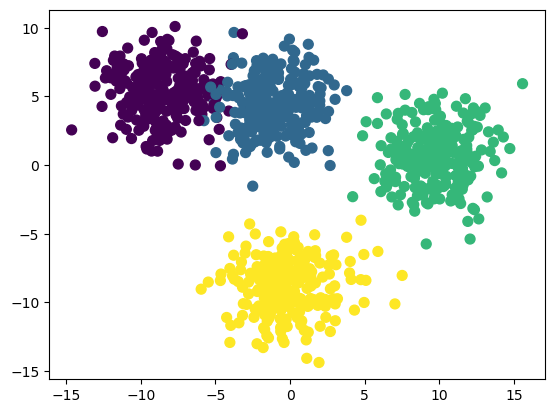

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.96      0.94      0.95        53
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



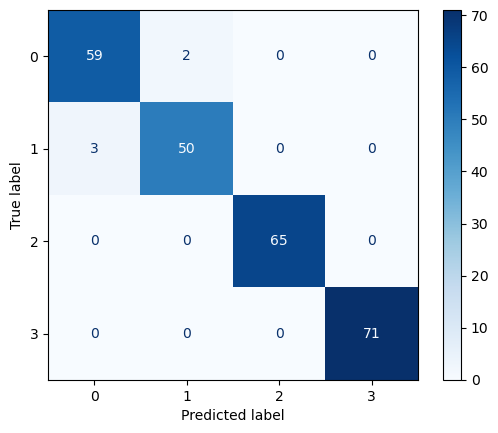

In [3]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, n_features=2, random_state=7)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# plot the blobs colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

k = 5
# define the model
model = KNeighborsClassifier(n_neighbors=k)
# fit the model
model.fit(X_train, Y_train)
# predict labels
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap=plt.cm.Blues)

print(classification_report(Y_test, y_pred))

### 1.1 Implement KNN

Outline of KNN algorithm:

* INPUT: 
    - X_train (training array of N1 observations and M variables)
    - y_train (array of N1 labels for the observations)
    - X_test (test array of N2 observations and M variables)
    - k (number of nearest neighbors to use)
* DO:
    - check that the arrays have correct shape
    - calculate array of distances between the points in the training array and the test array (Hint: use `pairwise_distances`)
    - sort the array of distances and keep the k closest training points for each test point (Hint: use `argsort` with option `axis=0`)
    - for each test point calculate the consensus label from the k nearest training points (Hint: use `mode`)
* OUTPUT: array of consensus labels for each test point

Write a function that follows this outline and test it on the blob data set. Experiment with increasing the number of nearest neighbors and report the effect on the prediction quality.

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.96      0.94      0.95        53
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        71

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



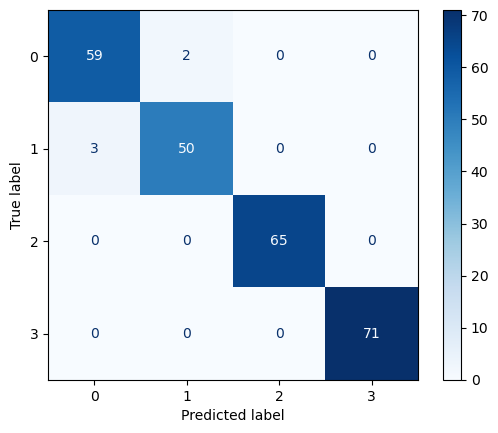

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7)
k = 5
def Key_KNN(X_train, Y_train, X_test, k):
    """Implements the K-nearest neighbors classification algorithm"""
    #Check for shape
    if X_train.shape[1] != X_test.shape[1]:
        return 'Training and test dataset may not be same shape!'
    if k > X_test.shape[0]: 
        return 'K can not exceed number of observations!'
    else: 
        #Calculate array of distances b/w points in training array and test array
        dist = pairwise_distances(X_train, X_test)
        #sort the array of distances and keep the k closest training points for each test point 
        #(Hint: use argsort with option axis=0)
        sort = np.argsort(dist, axis=0) #returns rank distance for each distance b/w the test and training
        #k closest values
        sortk = sort[:k,:]
        #empty set
        pred = np.zeros(len(X_test))
        for i in range(len(X_test)):
            pred[i] = mode(Y_train[sortk[:,i]])[0]
        return pred

y_pred = Key_KNN(X_train, Y_train, X_test, k)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap=plt.cm.Blues)
print(classification_report(Y_test, y_pred))

### 1.2 Testing on the moons data set

The code below generates a (2-variable) data set of two-semicircular clusters and splits the data into training and test sets.

Apply your KNN function to moons data set, plot the confusion matrix and produce the classification report. Experiment by increasing the noise level in `make_moons` to make the clusters less distinct and report at which level the classification is no longer possible (the average accuracy is about 0.5). 

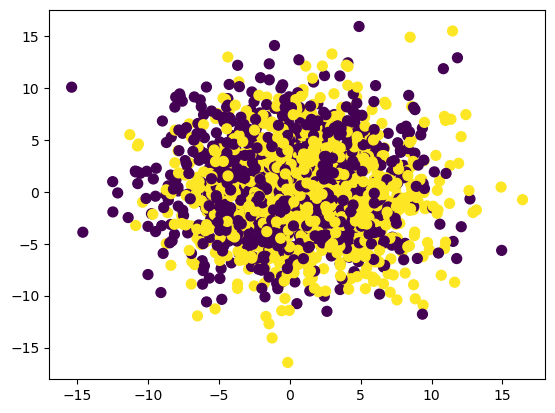

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       182
           1       0.55      0.48      0.51       218

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.51      0.50      0.50       400

The noise level has to be at least 4.4 to make the average accuracy of the classification about 0.5


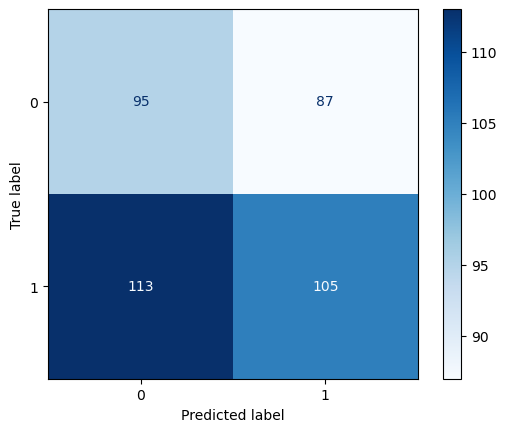

In [5]:
# generate "moons" dataset
Moons, moon_true = make_moons(2000, noise=4.4, random_state=7)

# plot the moons colored by cluster label
plt.scatter(Moons[:, 0], Moons[:, 1], c=moon_true, s=50, cmap='viridis')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(Moons, moon_true, test_size=0.2, random_state=7)

#Applying function
k=5
y_pred = Key_KNN(X_train,y_train, X_test, k)

#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

#Report
print(classification_report(y_test, y_pred))
print("The noise level has to be at least 4.4 to make the average accuracy of the classification about 0.5")

## Part 2: Naive Bayes Method

In the part you will implement the Naive Bayes classification method.

The code below generates 4 blob (2-variable) data set, splits the data into training and test sets, and uses the scikit-learn implementation of the Gaussian NB algorithm to classify the test set, plots the confusion matrix and produces a classification report with different measures of classification quality.

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.93      0.95        43
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        57

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



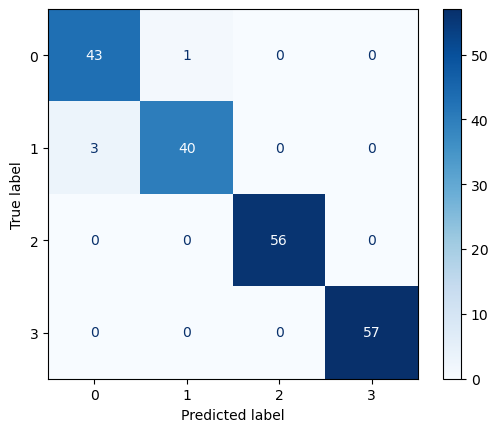

In [6]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, n_features=2, random_state=7)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# define the model
model = GaussianNB()
# fit the model
model.fit(X_train, y_train)
# predict labels
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

print(classification_report(y_test, y_pred))

### 2.1 Naive Bayes Gaussian fitting

The first step in Naive Bayes method is to calculate the probability distributions for each label in the training set. One can make various choices, so we will assume the normal (Gaussian) distribution, which is determined by the mean and standard deviation.

Outline of NB fitting:

* INPUT: 
    - X_train (training array of N observations and M variables)
    - y_train (array of N labels for the observations)

* DO:
    - check that the arrays have correct shape
    - calculate the number of different labels in y_train (Hint: use `np.unique`)
    - for each different label
        - calculate the prior probability as the fraction of training set that has this label (Hint use `len` and the logical `==` to slice the array)
        - calculate the mean of the training observations with this label for each variable (Hint: use `np.mean` with `axis = 0`)
        - calculate the standard deviation of the training observations with this label for each variable  (Hint: use `np.std` with `axis = 0`)

* OUTPUT: 
    - array of prior probabilities (length of number of distinct labels)
    - array of means (shape number of labels by number of variables M)
    - array of standard devs (shape number of labels by number of variables M)

Write a function that follows this outline and test it on the blob data set. Compare the vector of priors, and the arrays of means and standard deviations with the parameters from the blob data (e.g. check that the means correspond to the center points of the blobs, and the standard deviations are consistent with the cluster_std value).

[0.252      0.26266667 0.24666667 0.23866667] [[-8.42131538  5.32794382]
 [-1.12228933  4.32371558]
 [ 9.6520731   0.68477154]
 [-0.17166964 -8.62453144]] [[1.90721797 1.9686845 ]
 [1.76220828 1.96711386]
 [1.99185549 1.96687168]
 [2.15068615 1.81803415]]


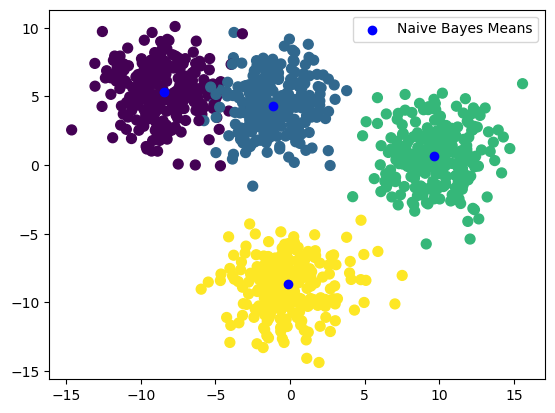

In [9]:
def Key_NB(X_train,Y_train):
    #Check for shape
    if len(X_train) != len(Y_train):
        return 'Training input and response data are not the same length!'
    else: 
        y_labels = np.unique(Y_train)
        # for each different label
        # calculate the prior probability as the fraction of training set that has this label 
        #(Hint use len and the logical == to slice the array)
        priors = []
        means = []
        sds = []
        for i in range(len(y_labels)):
            #fraction of training set that has this label
            prior = len(Y_train[Y_train==y_labels[i]])/len(Y_train)
            priors.append(prior)
            # calculate the mean of the training observations with this label for each variable 
            #(Hint: use np.mean with axis = 0)
            mean = np.mean(X_train[np.where(Y_train==y_labels[i])],axis=0)
            means.append(mean)
            # calculate the standard deviation of the training observations with this label for each 
            # variable (Hint: use np.std with axis = 0)
            sd = np.std(X_train[np.where(Y_train==y_labels[i])],axis=0)
            sds.append(sd)
        return np.array(priors), np.array(means), np.array(sds)

X, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, n_features=2, random_state=7)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7)

#Test
priors, means, sds = Key_NB(X_train,Y_train)
print(priors, means, sds)


# plot the blobs colored by cluster label

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(means[:,0],means[:,1],c='blue',label='Naive Bayes Means')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

### 2.2 Naive Bayes prediction

Now we implement the prediction step of the NB algorithm. This uses the calculated  distribution parameters (means and standard deviations) as well the prior probabibilities for each label to calculate the *posterior probability* for each label to be applied to each data point. Specifically, the probability that label $k$ applies to data point $X_i$, with $\pi_k$ denoting the prior probability of label $k$:

$$ P(k | X_i) = Pr(X_i | k) \pi_k $$

The conditional probability $Pr(X_i | k)$ depends on the distribution that we assumed; in our case, this is the normal distribution with means and variances calculated by the fitting function for each label k. For example, for the normal distribution with two variables (like in our blobs data), this probability will be:

$$ Pr(X_i | k) = e^{-(x_{i,1} - \mu_{k,1})^2/(2\sigma_{k,1}^2)}e^{-(x_{i,2} - \mu_{k,2})^2/(2\sigma_{k,2}^2)}$$

in which $x_{i,1}$ and $x_{i,2}$ are the values of the two variables in observation index $i$, $\mu_{k,1}$ and $\mu_{k,2}$ are the means of the two variables for label $k$ and $\sigma_{k,1}$ and $\sigma_{k,2}$ are the standard deviations for label $k$.

Luckily, scipy.stats has the function `norm` to compute the normal probability density function.

Outline of NB prediction:

* INPUT: 
    - X_test (testing array of N observations and M variables)
    - labels (array of k distinct labels to use)
    - prior (array of k prior probabilities for each distinct label)
    - means (array of M by k means)
    - sigmas (array of M by k standard deviations)

* DO:
    - check that the arrays have correct shape
    - calculate the number of different labels in y_train (Hint: use `np.unique`)
    - for each test observation
        - for each distinct label
            - calculate the probability of this label, given this observation (hint: use the function `norm()` with `.pdf()` and use `np.prod` to muliply array elements together)
        - pick the label with maximum probability for this observation, and assign this as your prediction (Hint: use `np.argmax`)
* OUTPUT: 
    - array of N predicted labels

Write a function that follows this outline and test it on the blob data set by comparing the output with that of the scikit-learn NB implementation shown above.

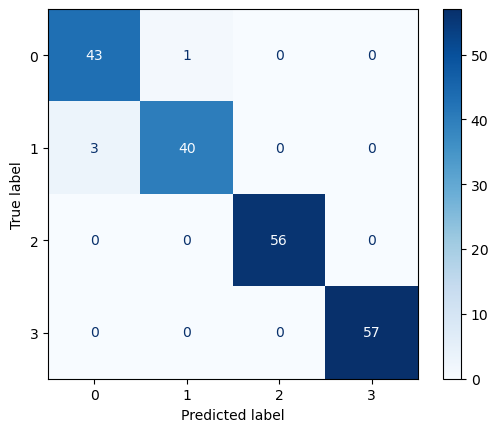

In [10]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, n_features=2, random_state=7)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

labels = np.unique(Y_train)
priors, means, sds = Key_NB(X_train,Y_train)

def NB_pred(X_test,labels,priors,means,sds):
    #Do X_test, means, and sds all have the same number of predictor variables?
    #Are there the same number of labels (k) in labels, priors, means, and sigmas? 
    if X_test.shape[1]==means.shape[1]==sds.shape[1]: 
        if labels.shape[0]==priors.shape[0]==means.shape[0]==sds.shape[0]:
            pred_label = []
            #for each test observation
            for i in range(X_test.shape[0]):
            #for each distinct label
                prob = []
                for k in range(len(labels)):
                    #calculate the probability of this label, given this observation (hint: use the function norm() 
                    #with .pdf() and use np.prod to muliply array elements together)
                    #pick observation i from x_test with label j
                    x = X_test[i]
                    #Probability of label k given observation i is equal to 
                    #the probability of observation i given k times the prior probability of k
                    prob_k = priors[k]*np.prod(norm.pdf(x,loc=means[k],scale=sds[k]))
                    prob.append(prob_k)
                #pick the label with maximum probability for this observation, and assign this as your prediction 
                #(Hint: use np.argmax)
                pred_label.append(np.argmax(prob))
            return pred_label 
    else:
        return("Mismatch in number of labels or predictor variables between sets!")

    

y_pred = NB_pred(X_test, labels, priors, means, sds)
y_pred = np.array(y_pred)

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap=plt.cm.Blues)


# print(classification_report(y_test, y_pred))

In [11]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=2, n_features=2, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### 2.2 Test on the moons data set

The code below generates a (2-variable) data set of two-semicircular clusters and splits the data into training and test sets.

Apply your NB function to moons data set, plot the confusion matrix and produce the classification report. Compare the prediction quality with that of the KNN method from Part 1.

Experiment by increasing the noise level in `make_moons` to make the clusters less distinct and report at which level the classification is no longer possible (the average accuracy is about 0.5). 

              precision    recall  f1-score   support

           0       0.46      0.58      0.52       182
           1       0.56      0.44      0.49       218

    accuracy                           0.50       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.50      0.50       400



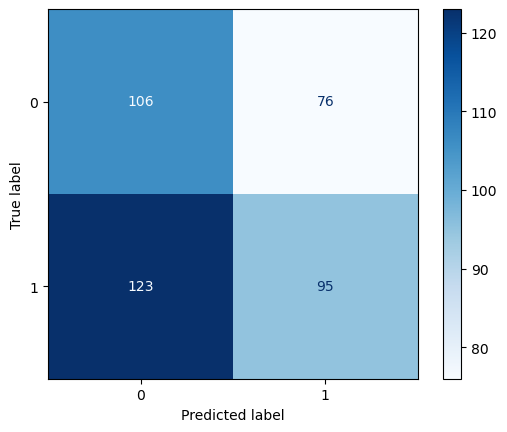

In [16]:
Moons, moon_true = make_moons(2000, noise=14, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(Moons, moon_true, test_size=0.2, random_state=7)

labels = np.unique(y_train)
priors, means, sds = Key_NB(X_train,y_train)

# predict labels
y_pred = NB_pred(X_test,labels,priors,means,sds)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

print(classification_report(y_test, y_pred))

## Part 3: classification on real data

The Wisconsin breast cancer data set contains information about different tumor biopsies in the form of 30 features of cell nuclei determined from images. The first two variables are the sample ID and the diagnosis (M = malignant or B = benign). The source and description of the data is here: https://archive-beta.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+diagnostic

The file `wdbc.csv` is loaded in the script below which also prints the names of all 32 variables in the header. Then the predictor variables are extracted into the array `wisc_vars`, and the labels (diagnosis) are extracted into the separate array `diag`. Then a vector `new_diag` is created that replaces the label 'B' with 0 and label 'M' with 1.

In [19]:
wis_data = pd.read_csv("wdbc.csv")
print(wis_data.head())


diag = np.array(wis_data.iloc[:,1])
wis_vars = np.array(wis_data.iloc[:,2:])
#rename the labels
new_diag = np.zeros(len(diag))
new_diag[diag=='B'] = 0
new_diag[diag=='M'] = 1

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

### 3.1 Use KNN on Wisconsin data set

Use 'train_test_split' and apply your KNN function to predict the correct diagnosis on the test set, plot the confusion matrix, and report the prediction quality.

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        85
         1.0       0.93      0.90      0.91        58

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



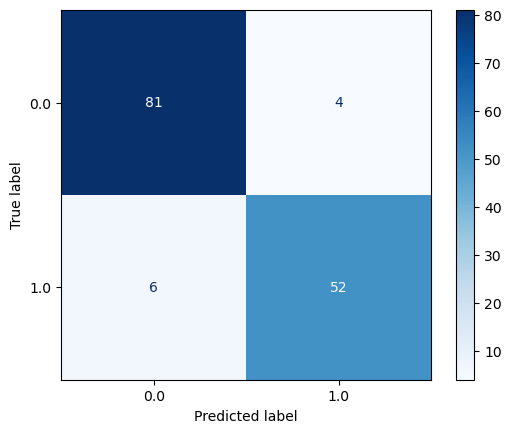

In [24]:
k=5
X_train, X_test, Y_train, Y_test = train_test_split(wis_vars, new_diag, test_size=0.25, random_state=8)
y_pred = Key_KNN(X_train,Y_train, X_test, k)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap=plt.cm.Blues)
print(classification_report(Y_test, y_pred))

### 3.2 Use NB on Wisconsin data set

Use 'train_test_split' and apply your Naive Bayes function to fit on the training set and then predict the correct diagnosis on the test set, plot the confusion matrix, and report the prediction quality. Which method performs better?

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        85
         1.0       0.94      0.88      0.91        58

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



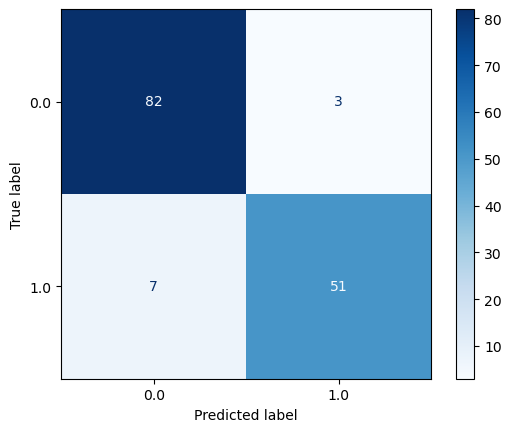

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(wis_vars, new_diag, test_size=0.25, random_state=8)
labels = np.unique(Y_train)
priors, means, sds = Key_NB(X_train,Y_train)

y_pred = NB_pred(X_test,labels,priors,means,sds)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, cmap=plt.cm.Blues)
print(classification_report(Y_test, y_pred))

Both methods work accurately and to the same degree of prediction quality.